In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat

In [2]:
df = pd.read_json('\\Users\\Trocados\\DataAnalytics\\Estastitica\\enem_2023.json')

In [3]:
df.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


In [4]:
df.iloc[:, :5]

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
0,585.669300,686.512178,390.482473,452.281333,546.371706
1,359.384608,642.084134,NaN,412.205207,741.825256
2,622.732384,495.510719,443.183580,669.683401,684.515750
3,350.164605,602.041588,413.979810,676.608952,671.237114
4,384.093657,489.249140,609.758123,520.426698,744.375048
...,...,...,...,...,...
995,455.479216,557.756326,511.347833,510.358766,NaN
996,457.755594,444.616952,542.028624,419.689692,715.984249
997,551.173161,568.769704,508.034658,NaN,798.408655
998,495.804002,522.125008,414.167228,451.696456,593.392939


## 1. Qual das disciplinas tem a maior amplitude de nota?


In [7]:
df.describe()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,897.000000,936.000000,824.000000,924.000000,860.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532
std,84.009313,77.811519,78.760404,86.648100,115.339972
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,458.360558,475.424546,444.709076,479.172971,556.468366
50%,515.045250,524.519920,500.479263,533.247767,635.273973
75%,571.635876,581.401952,548.751678,592.912963,715.989868
max,804.456317,763.919695,802.004568,807.877902,1000.000000


## 2. Qual é a média e a mediana para cada uma das disciplinas? (Lembre-sede remover todos os valores nulos quando considerar a mediana)


In [5]:
df[['Linguagens','Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação' ]].mean()

Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64

In [6]:
df[['Linguagens','Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação' ]].median()

Linguagens              515.045250
Ciências humanas        524.519920
Ciências da natureza    500.479263
Matemática              533.247767
Redação                 635.273973
dtype: float64

## 3. Considerando o curso de Ciência da Computação da UFPE, onde o peso cada uma das disciplinas ponderado:
a. Redação - 2

b. Matemática e suas Tecnologias - 4

c. Linguagens, Códigos e suas Tecnologias - 2

d. Ciências Humanas e suas Tecnologias - 1

e. Ciências da Natureza e suas Tecnologias - 1

Qual o desvio padrão e média das notas dos 500 estudantes mais bem colocados considerando esses pesos?


In [11]:
# Definindo os pesos
pesos = {
    "Redação": 2,
    "Matemática": 4,
    "Linguagens": 2,
    "Ciências humanas": 1,
    "Ciências da natureza": 1
}

# Calculando a média ponderada para cada estudante
df['media_ponderada'] = (df['Redação'] * pesos['Redação'] +
                         df['Matemática'] * pesos['Matemática'] +
                         df['Linguagens'] * pesos['Linguagens'] +
                         df['Ciências humanas'] * pesos['Ciências humanas'] +
                         df['Ciências da natureza'] * pesos['Ciências da natureza']) / sum(pesos.values())

# Selecionando os 500 melhores estudantes
melhores_500 = df.nlargest(500, 'media_ponderada')

# Calculando a média e o desvio padrão
media_melhores_500 = melhores_500['media_ponderada'].mean()
desvio_padrao_melhores_500 = melhores_500['media_ponderada'].std()

print(f"Média dos 500 melhores: {media_melhores_500}")
print(f"Desvio padrão dos 500 melhores: {desvio_padrao_melhores_500}")


Média dos 500 melhores: 557.2896772018769
Desvio padrão dos 500 melhores: 40.435866299464266


## 4. Se todos esses estudantes aplicassem para ciência da computação e existem apenas 40 vagas, qual seria a variância e média da nota dos estudantes que entraram no curso de ciência da computação?

In [12]:
# Selecionando os 40 primeiros estudantes
primeiros_40 = df.nlargest(40, 'media_ponderada')

# Calculando a variância e a média
media_primeiros_40 = primeiros_40['media_ponderada'].mean()
variancia_primeiros_40 = primeiros_40['media_ponderada'].var()

print(f"Média dos 40 primeiros: {media_primeiros_40}")
print(f"Variância dos 40 primeiros: {variancia_primeiros_40}")


Média dos 40 primeiros: 636.6827415075188
Variância dos 40 primeiros: 295.7675036004101


## 5. Qual o valor do teto do terceiro quartil para as disciplinas de matemática e linguagens?

In [17]:
# Calculando o terceiro quartil para Matemática e Linguagens
terceiro_quartil_matematica = df['Matemática'].quantile(0.75)
terceiro_quartil_linguagens = df['Linguagens'].quantile(0.75)

print(f"Terceiro quartil - Matemática: {terceiro_quartil_matematica}")
print(f"Terceiro quartil - Linguagens: {terceiro_quartil_linguagens}")


Terceiro quartil - Matemática: 592.9129628887
Terceiro quartil - Linguagens: 571.6358759278


## 6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos. Podemos dizer que são histogramas simétricos, justifique e classifique se não assimétricas?

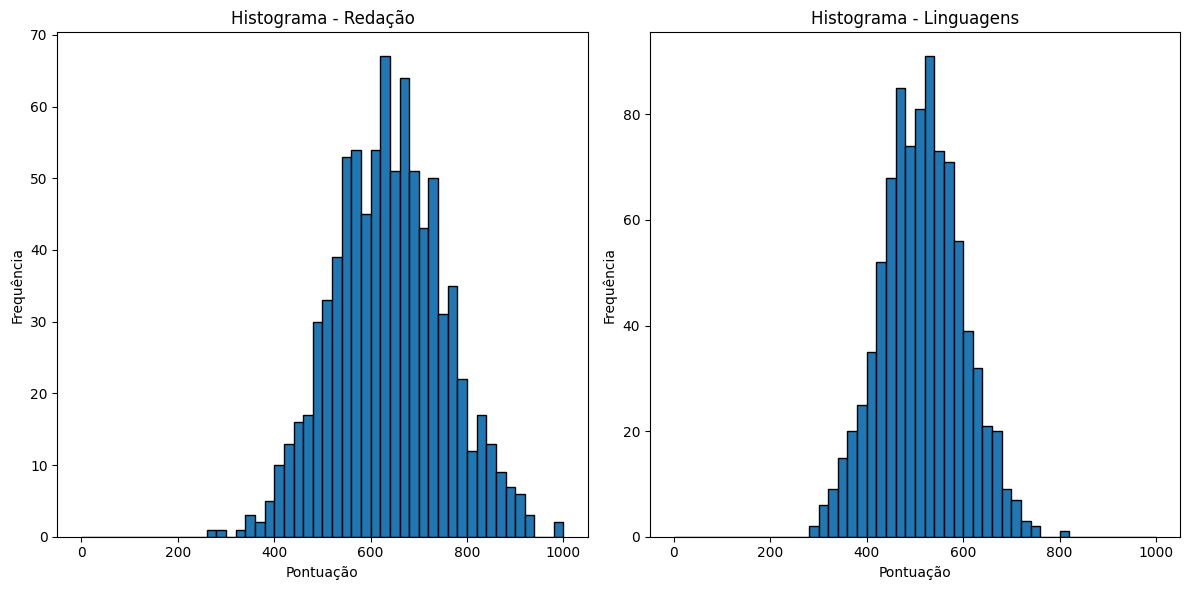

In [13]:
import matplotlib.pyplot as plt

# Criando o histograma para Redação
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Subplot para Redação
plt.hist(df['Redação'].dropna(), bins=range(0, 1001, 20), edgecolor='black')
plt.title('Histograma - Redação')
plt.xlabel('Pontuação')
plt.ylabel('Frequência')

# Criando o histograma para Linguagens
plt.subplot(1, 2, 2)  # Subplot para Linguagens
plt.hist(df['Linguagens'].dropna(), bins=range(0, 1001, 20), edgecolor='black')
plt.title('Histograma - Linguagens')
plt.xlabel('Pontuação')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


## 7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])

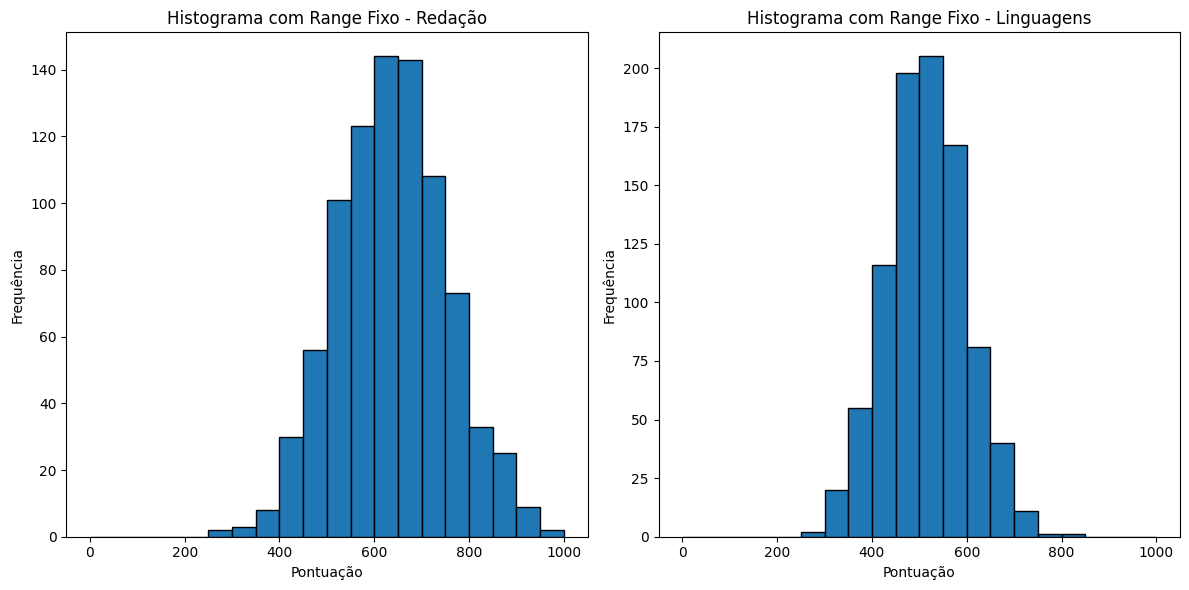

In [18]:
# Criando o histograma para Redação com range fixo
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Subplot para Redação
plt.hist(df['Redação'].dropna(), bins=20, range=(0, 1000), edgecolor='black')
plt.title('Histograma com Range Fixo - Redação')
plt.xlabel('Pontuação')
plt.ylabel('Frequência')

# Criando o histograma para Linguagens com range fixo
plt.subplot(1, 2, 2)  # Subplot para Linguagens
plt.hist(df['Linguagens'].dropna(), bins=20, range=(0, 1000), edgecolor='black')
plt.title('Histograma com Range Fixo - Linguagens')
plt.xlabel('Pontuação')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


## 8. Faça um boxplot do quartil de todas as disciplinas de ciências da natureza e redação. É possível enxergar outliers? Utilize o método IQR.

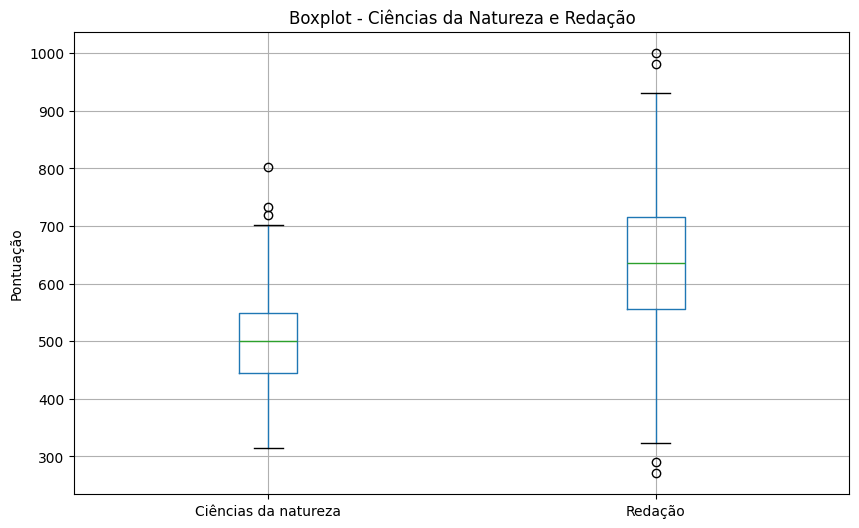

Outliers em Ciências da Natureza: 325    802.004568
482    732.502964
483    718.396061
Name: Ciências da natureza, dtype: float64
Outliers em Redação: 9       270.839965
545     290.308608
720    1000.000000
870     981.016553
Name: Redação, dtype: float64


In [20]:
# Criando boxplots para Ciências da Natureza e Redação
plt.figure(figsize=(10, 6))
df[['Ciências da natureza', 'Redação']].boxplot()
plt.title('Boxplot - Ciências da Natureza e Redação')
plt.ylabel('Pontuação')
plt.show()

# Calculando os outliers usando o método IQR
def identificar_outliers_iqr(serie):
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    lim_inferior = Q1 - 1.5 * IQR
    lim_superior = Q3 + 1.5 * IQR
    outliers = serie[(serie < lim_inferior) | (serie > lim_superior)]
    return outliers

outliers_ciencias = identificar_outliers_iqr(df['Ciências da natureza'])
outliers_redacao = identificar_outliers_iqr(df['Redação'])

print(f"Outliers em Ciências da Natureza: {outliers_ciencias}")
print(f"Outliers em Redação: {outliers_redacao}")


## 9. Remova todos os outliers e verifique se eles são passíveis de alterar a média nacional significativamente? (considere significativamente um valor acima de 5%)


In [23]:
# Filtrando apenas as colunas numéricas
colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns

# Recalculando a média nacional considerando apenas as colunas numéricas
media_nacional_original = df[colunas_numericas].mean()
media_nacional_sem_outliers = df_sem_outliers[colunas_numericas].mean()

# Comparando as médias
diferenca_media = (media_nacional_sem_outliers - media_nacional_original) / media_nacional_original * 100
print(f"Impacto na média nacional após remover outliers: \n{diferenca_media}")



Impacto na média nacional após remover outliers: 
Linguagens             -0.009990
Ciências humanas       -0.035856
Ciências da natureza   -0.229157
Matemática              0.044125
Redação                -0.023995
media_ponderada         0.028974
dtype: float64


## 10. Considerando valores nulos, tente encontrar qual seria a melhor medida de tendência que pode substituir as notas nulas. Média, moda ou mediana? Substitua o valor por todos os três e diga qual delas altera menos a média geral e o desvio padrão.

In [25]:
# Filtrando as colunas numéricas
colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns

# Substituição dos valores nulos por média, moda e mediana nas colunas numéricas
df_media = df.copy()
df_media[colunas_numericas] = df[colunas_numericas].fillna(df[colunas_numericas].mean())

df_moda = df.copy()
df_moda[colunas_numericas] = df[colunas_numericas].fillna(df[colunas_numericas].mode().iloc[0])

df_mediana = df.copy()
df_mediana[colunas_numericas] = df[colunas_numericas].fillna(df[colunas_numericas].median())

# Recalculando a média geral e desvio padrão para cada caso
media_media = df_media[colunas_numericas].mean()
media_moda = df_moda[colunas_numericas].mean()
media_mediana = df_mediana[colunas_numericas].mean()

desvio_media = df_media[colunas_numericas].std()
desvio_moda = df_moda[colunas_numericas].std()
desvio_mediana = df_mediana[colunas_numericas].std()

# Comparando o impacto na média geral e desvio padrão
impacto_media = {
    'média': abs(media_media - df[colunas_numericas].mean()).sum(),
    'moda': abs(media_moda - df[colunas_numericas].mean()).sum(),
    'mediana': abs(media_mediana - df[colunas_numericas].mean()).sum()
}

impacto_desvio = {
    'média': abs(desvio_media - df[colunas_numericas].std()).sum(),
    'moda': abs(desvio_moda - df[colunas_numericas].std()).sum(),
    'mediana': abs(desvio_mediana - df[colunas_numericas].std()).sum()
}

print(f"Impacto na média geral (Média, Moda, Mediana): {impacto_media}")
print(f"Impacto no desvio padrão (Média, Moda, Mediana): {impacto_desvio}")


Impacto na média geral (Média, Moda, Mediana): {'média': 2.8421709430404007e-13, 'moda': 197.07188341939337, 'mediana': 1.8642212938365788}
Impacto no desvio padrão (Média, Moda, Mediana): {'média': 38.004695548868234, 'moda': 152.1569866767843, 'mediana': 37.980002924119724}
